In [53]:
import scienceplots
import matplotlib.pyplot as plt
plt.style.use(["science", "notebook"])

import wandb

In [67]:
import wandb

api = wandb.Api()

run_base = 'gnn_tracking/gnn_tracking_fd/'

k_to_run_name = {
    15: "tapir-of-sheer-glory",
    20: "mindful-invaluable-cassowary",
    25: "dangerous-hog-of-kindness",
    30: "annoying-malkoha-from-neptune",
    # 35: "victorious-pigeon-of-perspective",
}
foms = [
    "trk.double_majority_pt0.9",
    "trk.perfect_pt0.9",
    "trk.lhc_pt0.9",
]


In [69]:
from collections import defaultdict
results = defaultdict(list)
for k in k_to_run_name:
    run = api.run(run_base + "/" + k_to_run_name[k])
    history = run.history(10_000)
    # Make sure that we got everything, so max will be acc
    assert len(history) < 10_000
    fom_vals = [history[fom].max() for fom in foms]
    for key, v in zip(foms, fom_vals):
        results[key].append(v)


In [70]:
results

defaultdict(list,
            {'trk.double_majority_pt0.9': [0.9586646556854248,
              0.9695848226547241,
              0.9748060703277588,
              0.9800165295600891],
             'trk.perfect_pt0.9': [0.6448664665222168,
              0.7099058032035828,
              0.7451521158218384,
              0.7705803513526917],
             'trk.lhc_pt0.9': [0.9885677695274353,
              0.9904484152793884,
              0.9927858114242554,
              0.991692066192627]})

In [78]:
import pickle
import pandas as pd
df_gc = pd.read_pickle("/Users/fuchur/tmp/gc_results.pkl")

Text(0.5, 1.0, 'Double Majority Efficienty vs Graph Construction')

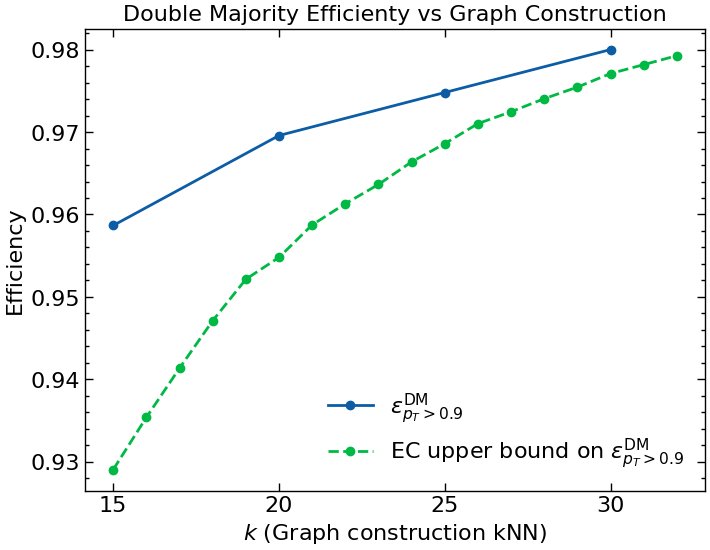

In [84]:
from gnn_tracking.utils.nomenclature import variable_manager as vm

import matplotlib.ticker as ticker
fig, ax = plt.subplots()
for v in ["trk.double_majority_pt0.9"]:
    line, *_ = ax.plot(
        list(k_to_run_name.keys()),
        results[v],
        label=vm[v.replace("trk.","")].latex,
        marker="o",
    )
    ax.plot(
        "k",
        f'max_{v.replace("trk.", "")}',
        label="EC upper bound on " + vm[v.replace("trk.","")].latex ,
        ls="--",
        marker="o",
        data=df_gc.query("14 < k < 33"),
    )

ax.xaxis.set_major_locator(ticker.FixedLocator([15, 20, 25, 30, 35]))
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.legend()
ax.set_xlabel("$k$ (Graph construction kNN)")
ax.set_ylabel("Efficiency")
ax.set_title("Double Majority Efficienty vs Graph Construction")


Text(0.5, 1.0, 'Perfect Tracking Efficienty vs Graph Construction')

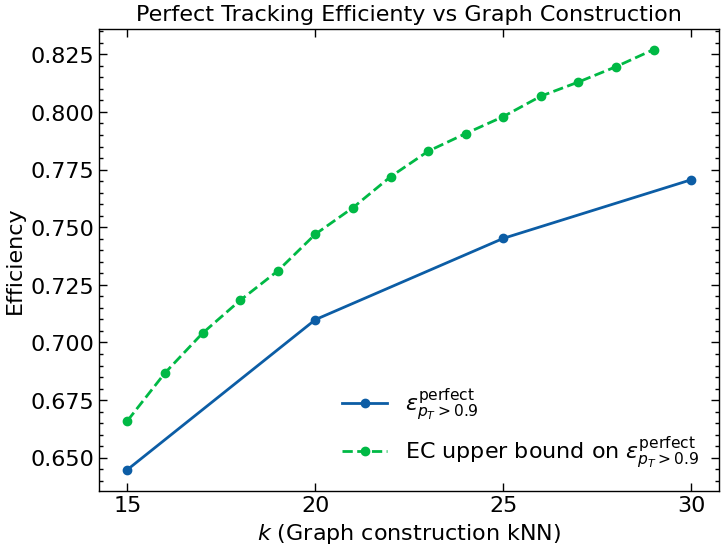

In [85]:
fig, ax = plt.subplots()
for v in ["trk.perfect_pt0.9"]:
    line, *_ = ax.plot(
        list(k_to_run_name.keys()),
        results[v],
        label=vm[v.replace("trk.","")].latex,
        marker="o",
    )
    ax.plot(
        "k",
        f'max_{v.replace("trk.", "")}',
        label="EC upper bound on " + vm[v.replace("trk.","")].latex ,
        ls="--",
        marker="o",
        data=df_gc.query("14 < k < 30"),
    )

ax.xaxis.set_major_locator(ticker.FixedLocator([15, 20, 25, 30, 35]))
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.legend()
ax.set_xlabel("$k$ (Graph construction kNN)")
ax.set_ylabel("Efficiency")
ax.set_title("Perfect Tracking Efficienty vs Graph Construction")